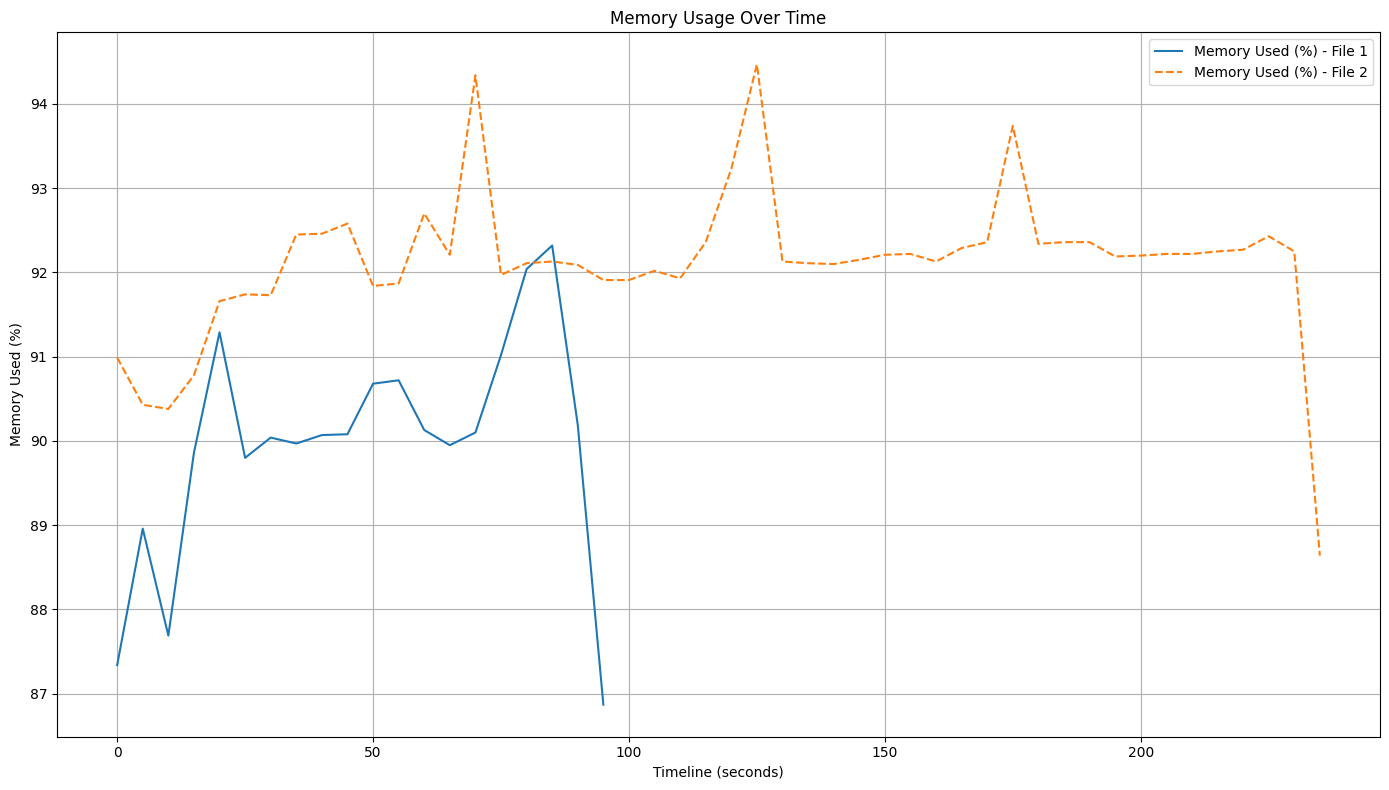

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

folder1 = '2024-06-04_10-45'
folder2 = '2024-06-04_11-10'
benchmark1 = 'wordcound'
benchmark2 = 'wordcound'

# Construct the file paths
file_path1 = f'data/{folder1}/{benchmark1}/monitoring_data/worker0/memory_usage_report.csv'
file_path2 = f'data/{folder2}/{benchmark2}/monitoring_data/worker0/memory_usage_report.csv'

# Read the CSV files
df1 = pd.read_csv(file_path1, sep=';')
df2 = pd.read_csv(file_path2, sep=';')

# Convert the timestamp to a datetime object
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df2['timestamp'] = pd.to_datetime(df2['timestamp'])

# Normalize the time to create a timeline
df1['timeline'] = (df1['timestamp'] - df1['timestamp'].min()).dt.total_seconds()
df2['timeline'] = (df2['timestamp'] - df2['timestamp'].min()).dt.total_seconds()

# Plot the data from the first file
plt.figure(figsize=(14, 8))
plt.plot(df1['timeline'], df1['%memused'], label='Memory Used (%) - File 1')

# Plot the data from the second file
plt.plot(df2['timeline'], df2['%memused'], label='Memory Used (%) - File 2', linestyle='dashed')

# Formatting the plot
plt.xlabel('Timeline (seconds)')
plt.ylabel('Memory Used (%)')
plt.title('Memory Usage Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
